Extract MFCCs, delta, and delta-delta coefficients.
Train SVM using these richer features.

In [1]:
import numpy as np
import librosa
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define feature extraction function
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)  # Load audio file with original sampling rate
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Combine features into a single feature vector
    combined_features = np.concatenate([
        np.mean(mfcc, axis=1),
        np.mean(mfcc_delta, axis=1),
        np.mean(mfcc_delta2, axis=1),
        np.mean(chroma, axis=1),
        np.mean(spectral_contrast, axis=1)
    ])

    return combined_features

# Directory containing audio files for each class
class_labels = ['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass',
                'Flute', 'Hi_hat', 'Saxophone', 'Snare_drum', 'Violin']
audio_dir = 'C:/Users/Natasha/Desktop/research_module/Musical_Instrument_Data'  # Replace with your audio dataset path

X, y = [], []

# Load and extract features for each class
for label_idx, label in enumerate(class_labels):
    label_dir = os.path.join(audio_dir, label)
    for file_name in os.listdir(label_dir):
        if file_name.endswith('.wav') or file_name.endswith('.mp3'):
            audio_path = os.path.join(label_dir, file_name)
            features = extract_features(audio_path)
            X.append(features)
            y.append(label_idx)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train SVM with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Step 7: Evaluate Best Model
print(f"Best Parameters: {grid.best_params_}")
predictions = grid.predict(X_test)

# Step 8: Display accuracy and classification report
print(f"Cross-Validation Accuracy: {grid.best_score_:.2f}")
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(classification_report(y_test, predictions, target_names=class_labels))


c:\Users\Natasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

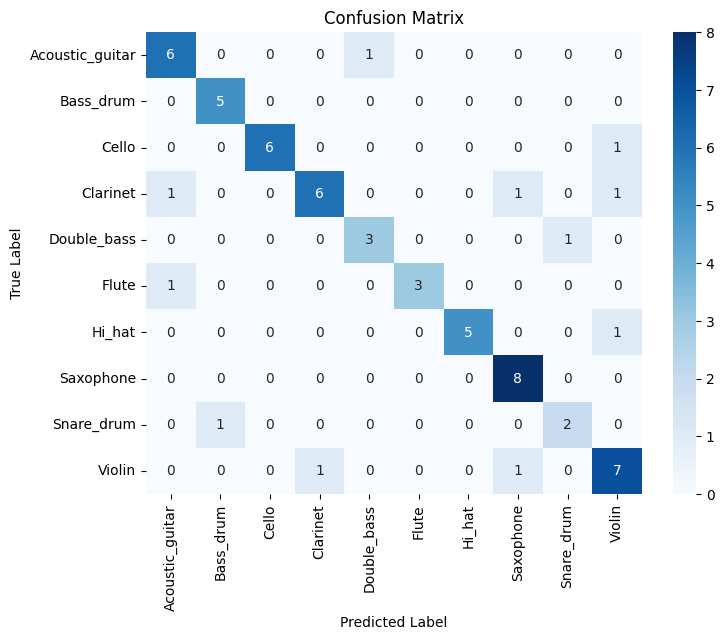

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix

conf_matrix2 = confusion_matrix(y_test, predictions)  # Model 2's confusion matrix
np.save("conf_matrix2.npy", conf_matrix2)  # Save it as a file


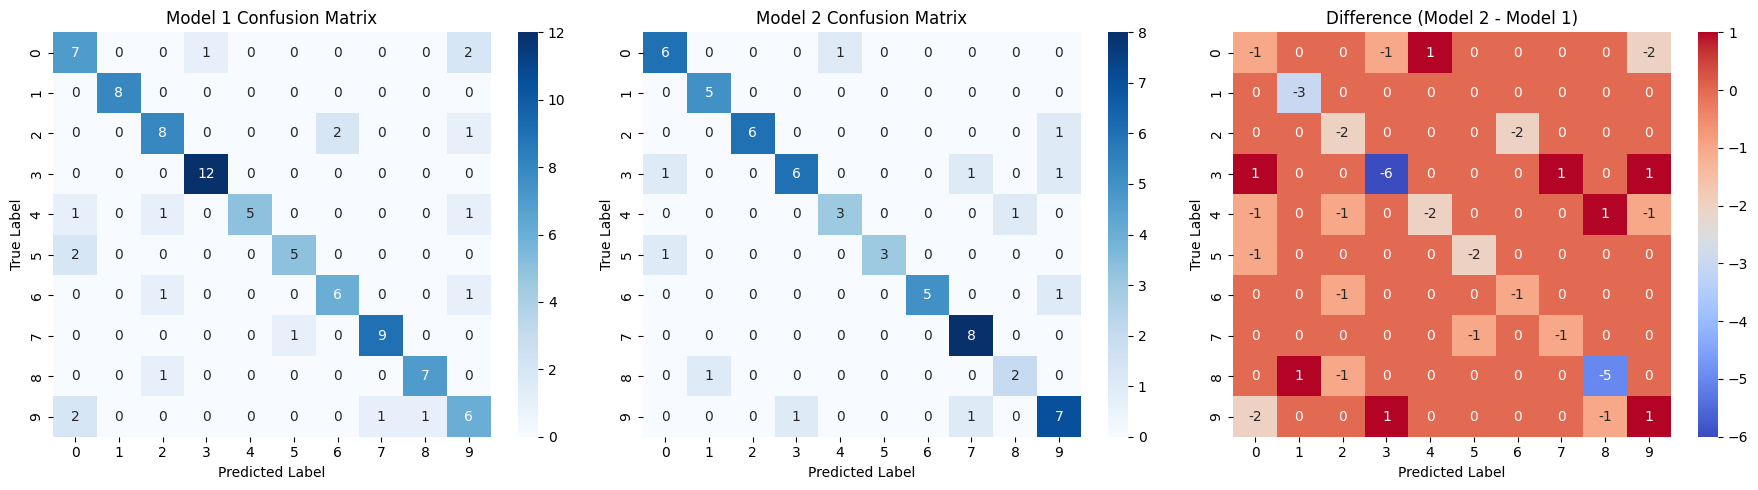

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load both confusion matrices
conf_matrix1 = np.load("conf_matrix1.npy")
conf_matrix2 = np.load("conf_matrix2.npy")

# Compute difference
conf_matrix_diff = conf_matrix2 - conf_matrix1

# Plot the matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_conf_matrix(ax, conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Model 1 Confusion Matrix
plot_conf_matrix(axes[0], conf_matrix1, "Model 1 Confusion Matrix")

# Model 2 Confusion Matrix
plot_conf_matrix(axes[1], conf_matrix2, "Model 2 Confusion Matrix")

# Difference Matrix
sns.heatmap(conf_matrix_diff, annot=True, fmt="d", cmap="coolwarm", cbar=True, ax=axes[2])
axes[2].set_title("Difference (Model 2 - Model 1)")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()
